In [36]:
import numpy as np
import matplotlib.pyplot as plt

[1.3, 2.3161171070309496, 2.5185853837360215, 2.108573529667347, 2.2784707064216514, 2.2745196128189313, 1.9611376410576185, 1.3761633998012202, 0.6110001794078878, 0.25]
[ 0.9         2.27777778  3.65555556  5.03333333  6.41111111  7.78888889
  9.16666667 10.54444444 11.92222222 13.3       ]


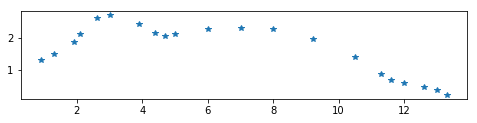

In [41]:
# pato
x_list = [0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3]
y_list = [1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25]



#x_list = [0.9,1.3,1.9]
#y_list = [1.3,1.5,1.85]

#perro
#x_list=[1,2,5,6,7,8,10,12,17,17,20,23,24,25,27,27.7,27.7,28,29,30]
#y_list=[3.0,3.7,3.9,4.2,5.7,6.6,7.1,6.7,4.5,4.5,7.0,6.1,5.6,5.8,5.2,4.1,4.1,4.3,4.1,3.0]
#x_list=[1,2,5,6,7,8,10,12,17,20,23,24,25,27,27.7,28,29,30]
#y_list=[3.0,3.7,3.9,4.2,5.7,6.6,7.1,6.7,4.5,7.0,6.1,5.6,5.8,5.2,4.1,4.3,4.1,3.0]
n = len(x_list)-1 #3/h[] n=3



x = np.zeros(n+1)

a = np.zeros(n+1)
b = np.zeros(n+1)
c = np.zeros(n+1)
d = np.zeros(n+1)

l  = np.zeros(n+1)
mu = np.zeros(n+1)
z  = np.zeros(n+1)

va = np.zeros(n+1)

h = np.zeros(n)



for i in range(0,len(x)):
    x[i] = x_list[i]
    a[i] = y_list[i]

#step 1

for i in range(0,n):
    h[i]=x[i+1]-x[i]


#step 2

for i in range(1,n):
    va[i] = 3/h[i] * (a[i+1]-a[i]) - 3/h[i-1] * (a[i]-a[i-1])
    
#step 3, solucion del sistema de ecuaciones lineales


l[0] = 1
mu[0] = 0
z[0] = 0

for i in range(1,n):
    l[i] = 2*(x[i+1]-x[i-1]) - h[i-1]*mu[i-1]
    mu[i] = h[i]/l[i]
    z[i] = (va[i]-h[i-1]*z[i-1])/l[i]
        
l[n] = 1
z[n] = 0
c[n] = 0

for j in np.arange(n-1,-1,-1):
    c[j] = z[j]-mu[j]*c[j+1]
    b[j] = (a[j+1]-a[j])/h[j] - h[j]*(c[j+1]+2*c[j])/3
    d[j] = (c[j+1]-c[j])/(3*h[j])
    

#print("aj = ",a)
#print("bj = ",b)
#print("cj = ",c)
#print("dj = ",d)
  
x_array = np.linspace(min(x_list),max(x_list),10)
#y_real = np.e**(x_array)

y_array = []


sum=0
for i in range(0,len(x_array)):
    for j in range(0,n):
        if x[j]<=x_array[i]<x[j+1]:
            sum+=1
            s = a[j]+b[j]*(x_array[i]-x[j]) + c[j]*(x_array[i]-x[j])**2 + d[j]*(x_array[i]-x[j])**3
            y_array.append(s)
    if x_array[i]==x[n]:      
        s = a[n]+b[n]*(x_array[i]-x[n]) + c[n]*(x_array[i]-x[n])**2 + d[n]*(x_array[i]-x[n])**3
        y_array.append(s)
#print(sum)
#print(len(y_array))
#print(len(x_array))

print(y_array)
print(x_array)


fig=plt.figure(figsize=(8,8))
ax=plt.axes()
ax.plot(x_list,y_list,'*')
#ax.plot(x_array,y_array,'-')
ax.set_aspect('equal')
#ax.plot(x_array,y_real,'--')


In [38]:
# Clamped cubic spline